In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
from sklearn.datasets import load_boston

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [24]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.model_selection import cross_val_score

In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [8]:
import pandas as pd

## load data from scikit learn

In [9]:
boston = load_boston()

In [10]:
type(boston)
boston.data.shape
boston.keys()
boston.feature_names

sklearn.utils.Bunch

(506, 13)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## make pandas df

#### df from features

In [12]:
df_boston = pd.DataFrame(boston.data)
df_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### add column names

In [13]:
df_boston.columns = boston.feature_names
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### add target values

In [14]:
df_boston['PRICE'] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## model with scikit learn

#### create feature and target arrays from df

In [15]:
X = df_boston.drop('PRICE', axis=1).values
y = df_boston['PRICE'].values

In [16]:
X.shape
y.shape

(506, 13)

(506,)

#### predict house price from a single feature (number rooms)

In [17]:
X_rooms = X[:,5]

In [18]:
type(X_rooms), type(y)
X_rooms.shape , y.shape

(numpy.ndarray, numpy.ndarray)

((506,), (506,))

In [19]:
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1,1)
X_rooms.shape , y.shape

((506, 1), (506, 1))

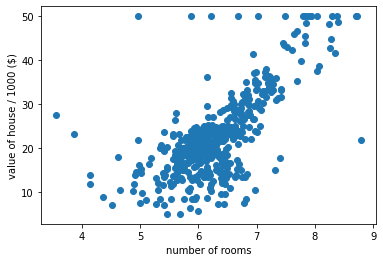

In [20]:
plt.scatter(X_rooms, y);
plt.ylabel('value of house / 1000 ($)');
plt.xlabel('number of rooms');
plt.show();

In [21]:
reg = LinearRegression()
reg.fit(X_rooms, y)

LinearRegression()

In [22]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)
prediction_space.shape

(50, 1)

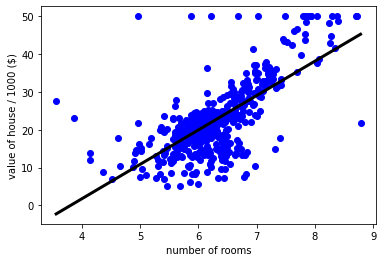

In [23]:
plt.scatter(X_rooms, y, color='blue');
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3);
plt.ylabel('value of house / 1000 ($)');
plt.xlabel('number of rooms');
plt.show();

#### predict house price using all features

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [27]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

LinearRegression()

In [28]:
reg_all.score(X_test, y_test)

0.711226005748496

#### K fold cross validation

In [44]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)

In [45]:
cv_results
cv_results.mean()
cv_results.std()

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

0.3532759243958773

0.3765678393326226

#### ridge regression (L2 regularization)

In [33]:
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

Ridge(alpha=0.1, normalize=True)

0.6996938275127313

#### lasso regression (L1 regularization)

In [35]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

Lasso(alpha=0.1, normalize=True)

0.5950229535328551

In [41]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso_coef = lasso.fit(X, y).coef_

In [42]:
names = df_boston.drop('PRICE', axis=1).columns
names
lasso_coef

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.95469455, -0.        ,  0.        , -0.        , -0.        ,
       -0.24795837,  0.        , -0.42817439])

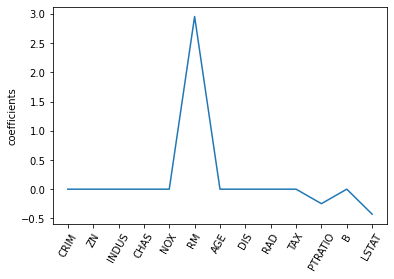

In [43]:
plt.plot(range(len(names)), lasso_coef);
plt.xticks(range(len(names)), names, rotation=60);
plt.ylabel('coefficients');
plt.show();